# EDA

In [1]:
# ============================
# 1. Import libraries & settings
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Display format
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# ============================
# 2. Load dataset
# ============================
eda = pd.read_csv("../data/processed/wdi_hdr.csv")

# Preview
display(eda.head())
eda.info()

,ISO3,Country_Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),GDP per capita (constant 2015 US$),Imports of goods and services (% of GDP),"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population growth (annual %),HDI
0,AFG,Afghanistan,1990,139.38,15.60,7.58,2.72,453.24,43.90,45.12,0.00,180.70,"-458,737.00",18.47,"12,045,660.00",7.91,1.86,0.28
1,AFG,Afghanistan,1991,145.38,15.60,7.63,2.72,453.24,43.90,45.52,0.00,174.40,"32,782.00",18.76,"12,238,879.00",8.07,2.01,0.29
2,AFG,Afghanistan,1992,147.50,15.60,7.70,2.72,453.24,43.90,46.57,0.00,168.50,"1,197,329.00",20.36,"13,278,974.00",8.01,8.57,0.30
3,AFG,Afghanistan,1993,149.46,15.60,7.76,2.72,453.24,43.90,51.02,0.00,163.00,"1,149,684.00",22.91,"14,943,172.00",7.89,12.22,0.31
4,AFG,Afghanistan,1994,156.84,15.60,7.77,2.72,453.24,43.90,50.97,0.00,157.70,"315,206.00",24.92,"16,250,794.00",7.82,8.81,0.30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   ISO3                                                                 5712 non-null   object 
 1   Country_Name                                                         5712 non-null   object 
 2   Year                                                                 5712 non-null   int64  
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)        5712 non-null   float64
 4   Exports of goods and services (% of GDP)                             5712 non-null   float64
 5   Fertility rate, total (births per woman)                             5712 non-null   float64
 6   GDP growth (annual %)                                                5712 non-null   float64
 7   GDP pe

In [3]:
# ============================
# 3. Summary statistics
# ============================
summary_stats = eda.describe().T  # Transpose for readability
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
Year,"5,712.00","2,006.50",9.81,"1,990.00","1,998.00","2,006.50","2,015.00","2,023.00"
"Adolescent fertility rate (births per 1,000 women ages 15-19)","5,712.00",58.77,46.92,0.54,18.51,47.73,88.63,212.25
Exports of goods and services (% of GDP),"5,712.00",38.73,27.14,0.01,21.01,32.86,48.92,228.99
"Fertility rate, total (births per woman)","5,712.00",3.17,1.69,0.72,1.74,2.67,4.38,8.61
GDP growth (annual %),"5,712.00",3.40,6.68,-64.05,1.40,3.75,5.97,149.97
GDP per capita (constant 2015 US$),"5,712.00","11,617.87","17,190.39",188.66,"1,371.73","4,000.30","12,545.22","112,417.88"
Imports of goods and services (% of GDP),"5,712.00",43.92,24.48,0.02,27.60,38.24,55.11,208.33
"Life expectancy at birth, total (years)","5,712.00",68.62,9.62,12.16,62.66,70.56,75.87,84.56
Mobile cellular subscriptions (per 100 people),"5,712.00",57.11,54.08,0.00,1.43,47.08,106.01,220.41
"Mortality rate, under-5 (per 1,000 live births)","5,712.00",46.46,52.53,2.10,9.40,24.45,66.22,478.90


In [4]:
# ============================
# 4. Number of countries and years
# ============================
num_countries = eda['Country_Name'].nunique()
num_years = eda['Year'].nunique()
print(f"Number of countries in the dataset: {num_countries}")
print(f"Number of years covered in the dataset: {num_years}")

Number of countries in the dataset: 168
Number of years covered in the dataset: 34


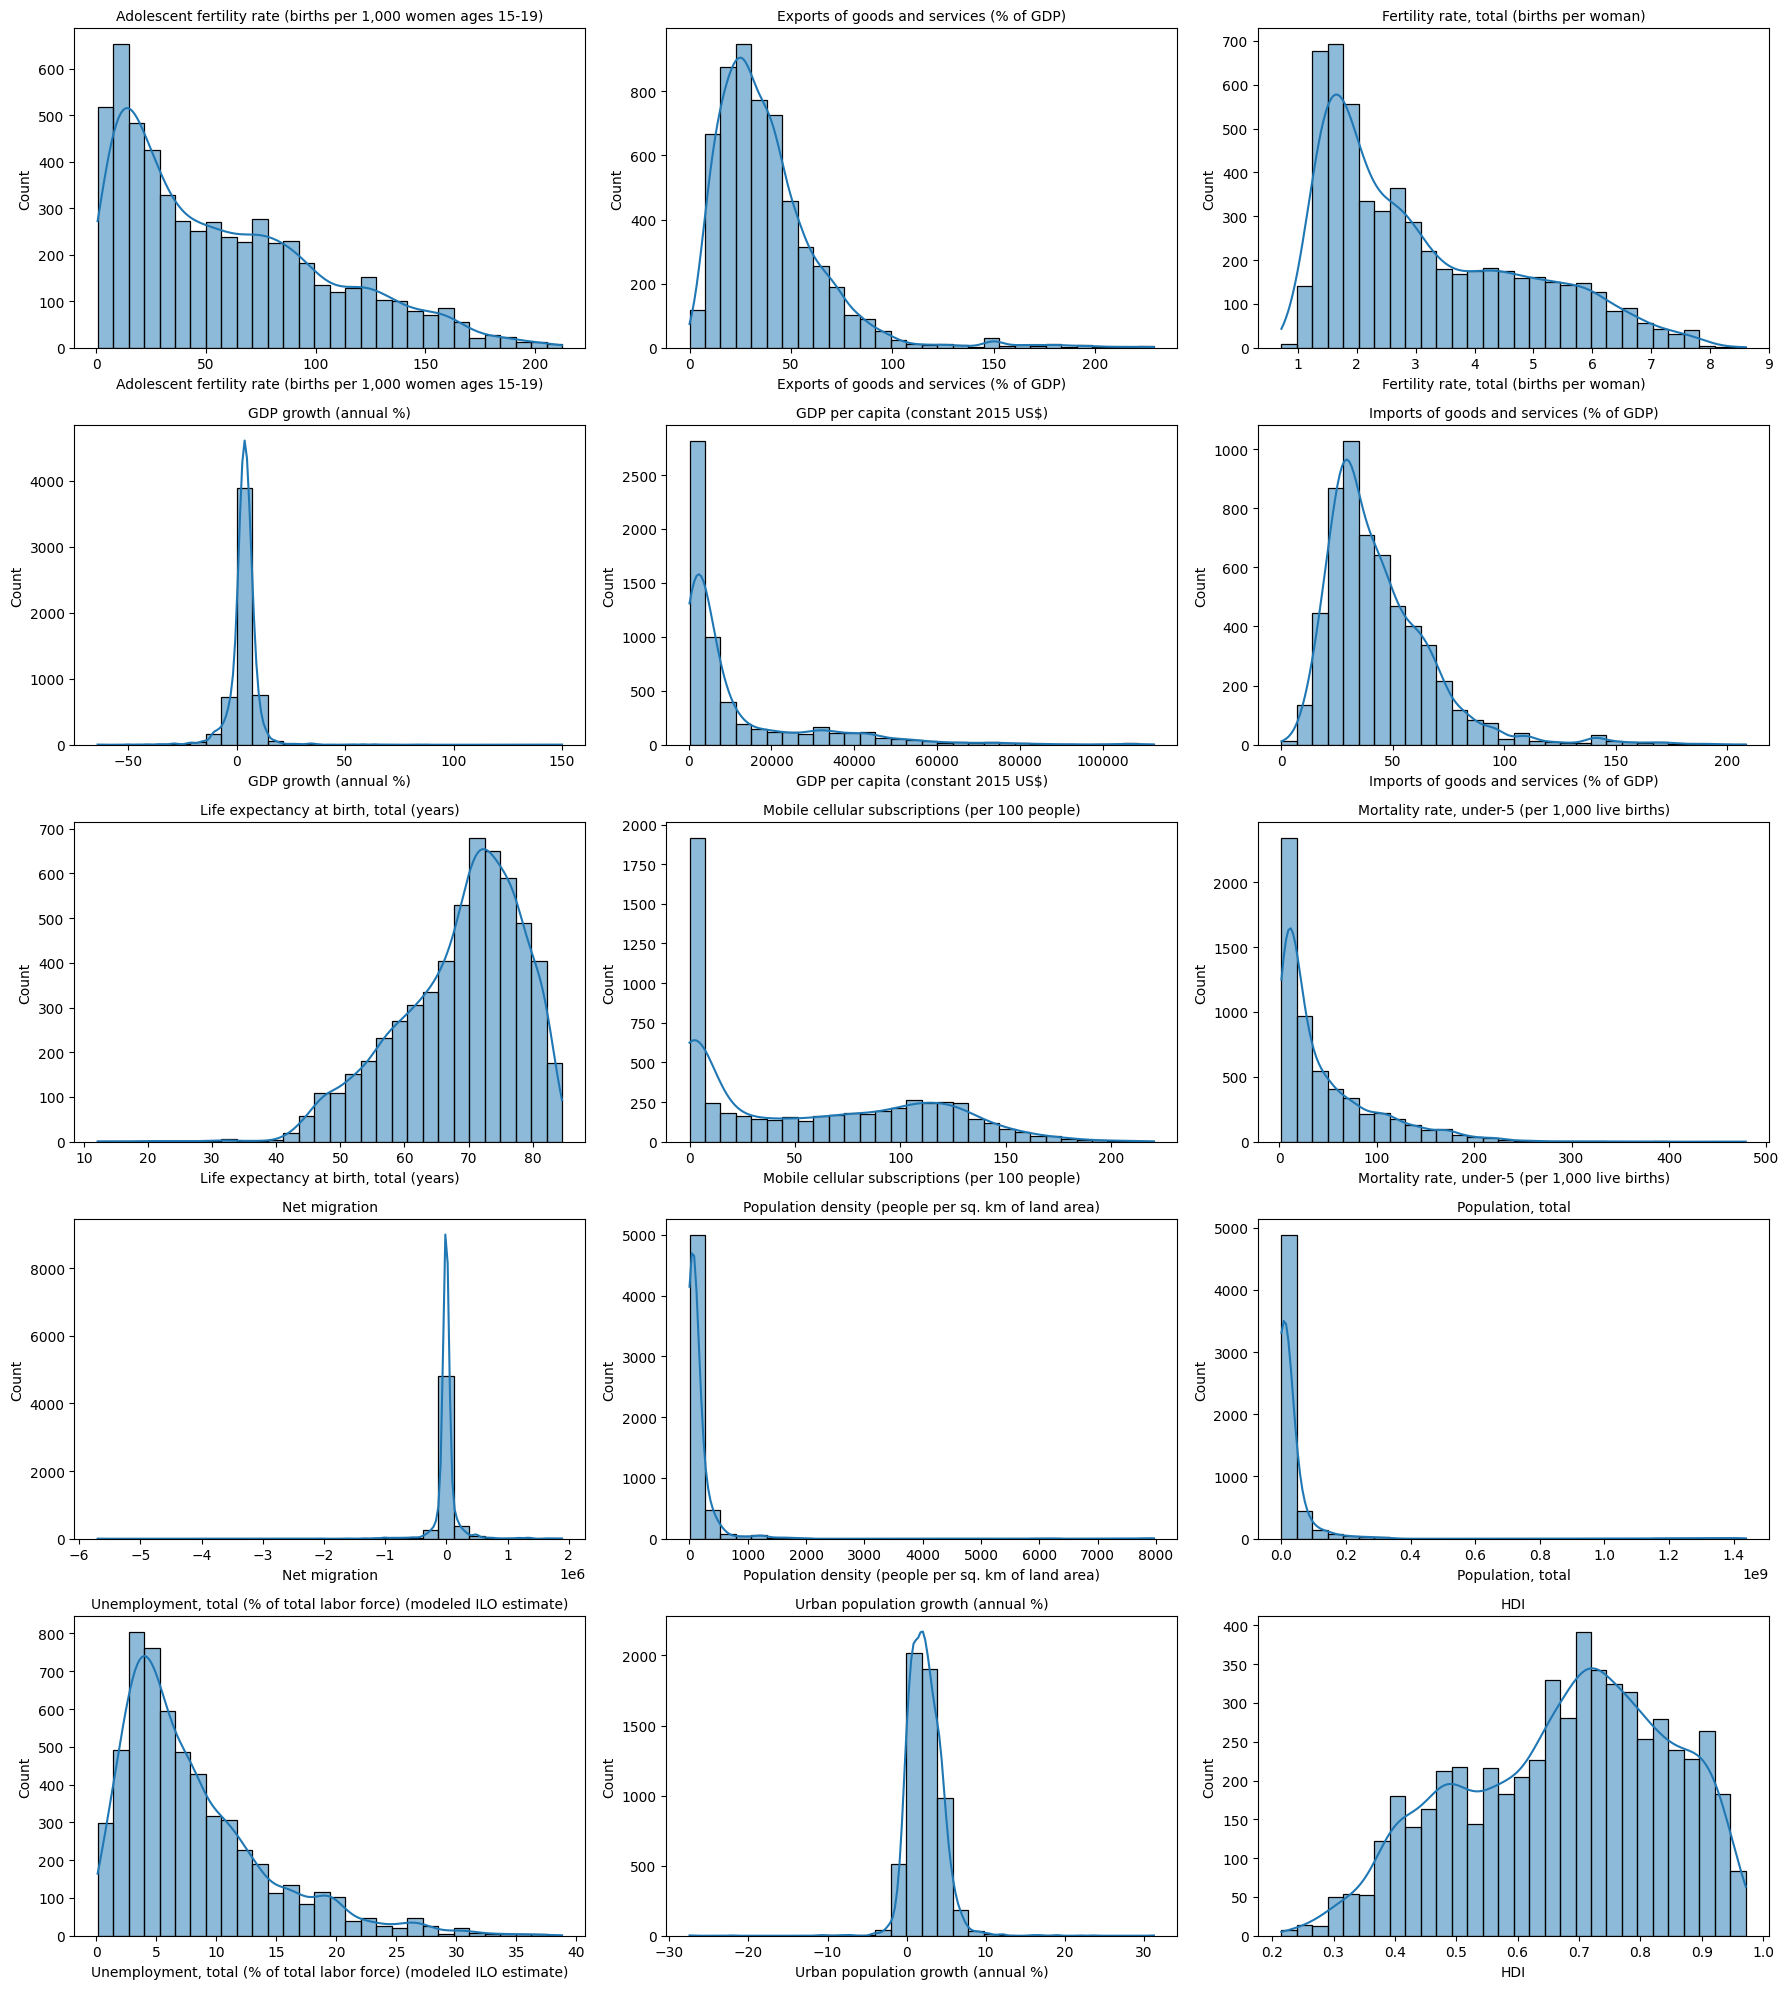

In [5]:
# ============================
# 5. Distribution plots for all indicators
# ============================
indicators = [
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Exports of goods and services (% of GDP)',
    'Fertility rate, total (births per woman)',
    'GDP growth (annual %)',
    'GDP per capita (constant 2015 US$)',
    'Imports of goods and services (% of GDP)',
    'Life expectancy at birth, total (years)',
    'Mobile cellular subscriptions (per 100 people)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'Net migration',
    'Population density (people per sq. km of land area)',
    'Population, total',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Urban population growth (annual %)',
    'HDI'
]

n_cols = 3
n_rows = math.ceil(len(indicators) / n_cols)

plt.figure(figsize=(n_cols*6, n_rows*4))
for i, col in enumerate(indicators, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(eda[col], kde=True, bins=30)
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

In [6]:
# ============================
# 6. Create Net migration per 1000 people
# ============================
eda['Net migration per 1000'] = eda['Net migration'] / (eda['Population, total'] / 1000)

print("\nNet migration per 1000 statistics:")
print(eda['Net migration per 1000'].describe())


Net migration per 1000 statistics:
count   5,712.00
mean        0.01
std        17.73
min      -709.90
25%        -3.40
50%        -0.29
75%         2.60
max       340.85
Name: Net migration per 1000, dtype: float64


In [7]:
# ============================
# 7. Correlation analysis
# ============================
eda_work = eda.drop(columns=['ISO3', 'Country_Name', 'Year'])

# Full correlation matrix
corr_matrix = eda_work.corr()

# Correlation with target (exclude absolute Net migration to avoid confusion)
target_corr = corr_matrix["Net migration per 1000"].drop(
    ["Net migration", "Net migration per 1000"], errors="ignore"
)

# Sort correlations by absolute value
all_corr = target_corr.abs().sort_values(ascending=False)

print("\nAll correlations with Net migration per 1000:")
print(all_corr)


All correlations with Net migration per 1000:
Urban population growth (annual %)                                    0.41
GDP per capita (constant 2015 US$)                                    0.24
Exports of goods and services (% of GDP)                              0.17
GDP growth (annual %)                                                 0.17
Life expectancy at birth, total (years)                               0.15
HDI                                                                   0.12
Mobile cellular subscriptions (per 100 people)                        0.12
Mortality rate, under-5 (per 1,000 live births)                       0.09
Adolescent fertility rate (births per 1,000 women ages 15-19)         0.09
Unemployment, total (% of total labor force) (modeled ILO estimate)   0.08
Population density (people per sq. km of land area)                   0.07
Fertility rate, total (births per woman)                              0.06
Imports of goods and services (% of GDP)             

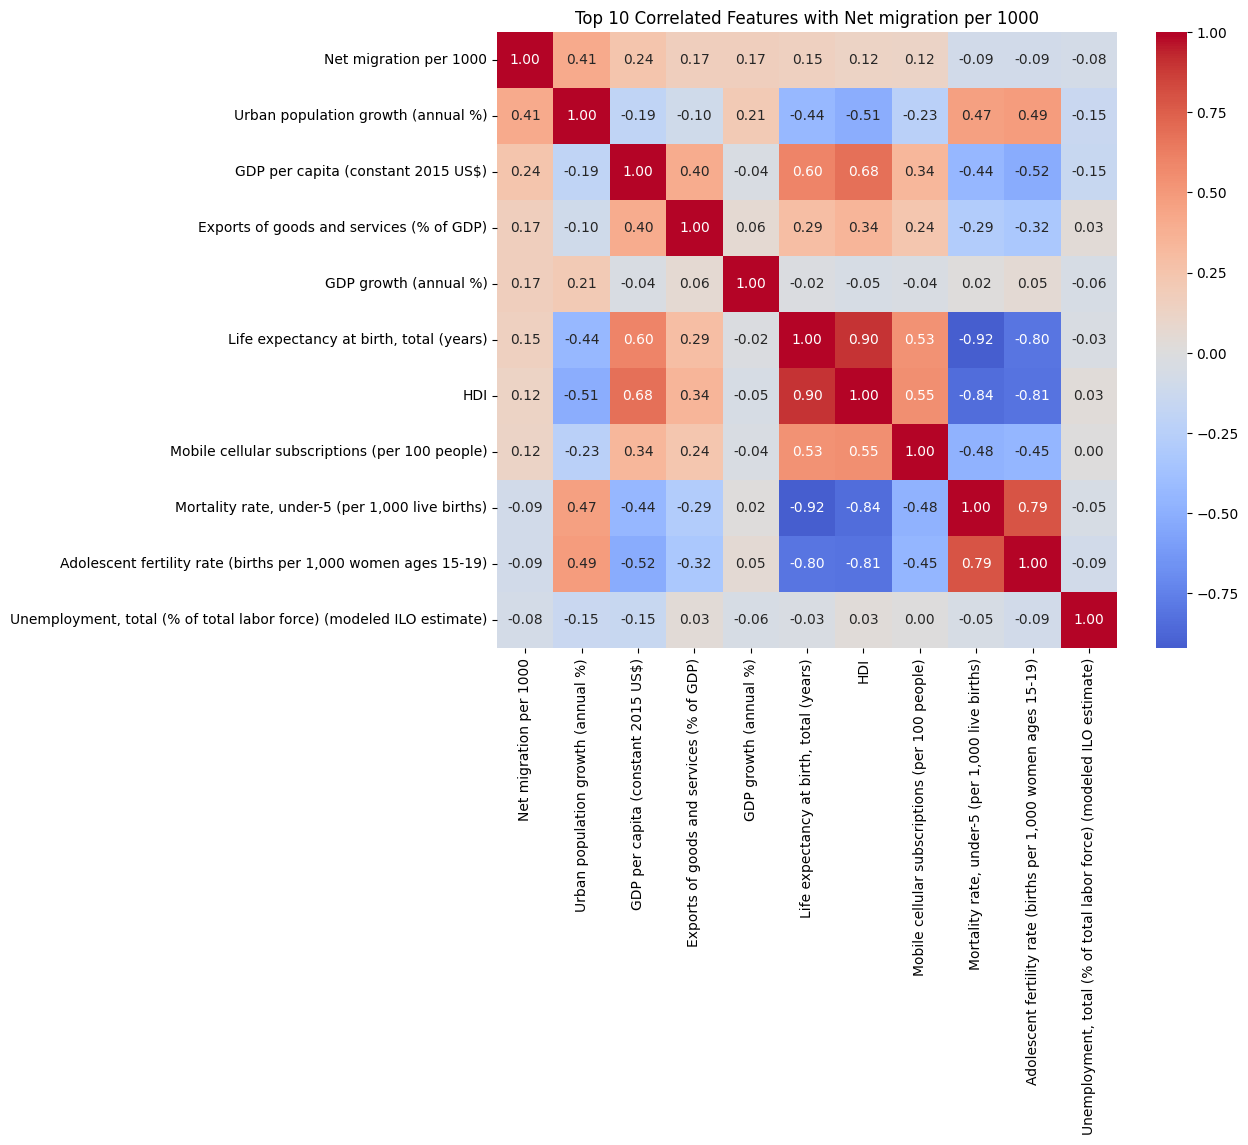

In [8]:
# ============================
# 8. Heatmap of Top 10 correlated features
# ============================
# Select top 10 correlated features
top_corr = all_corr.head(10).index.tolist()

# Place target first, then the others (deduplicated)
heatmap_vars = ["Net migration per 1000"] + [c for c in top_corr if c != "Net migration per 1000"]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda_work[heatmap_vars].corr(),
            annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Top 10 Correlated Features with Net migration per 1000")
plt.show()

Columns for pairplot: ['Urban population growth (annual %)', 'GDP per capita (constant 2015 US$)', 'Exports of goods and services (% of GDP)', 'GDP growth (annual %)', 'Life expectancy at birth, total (years)', 'Net migration per 1000']


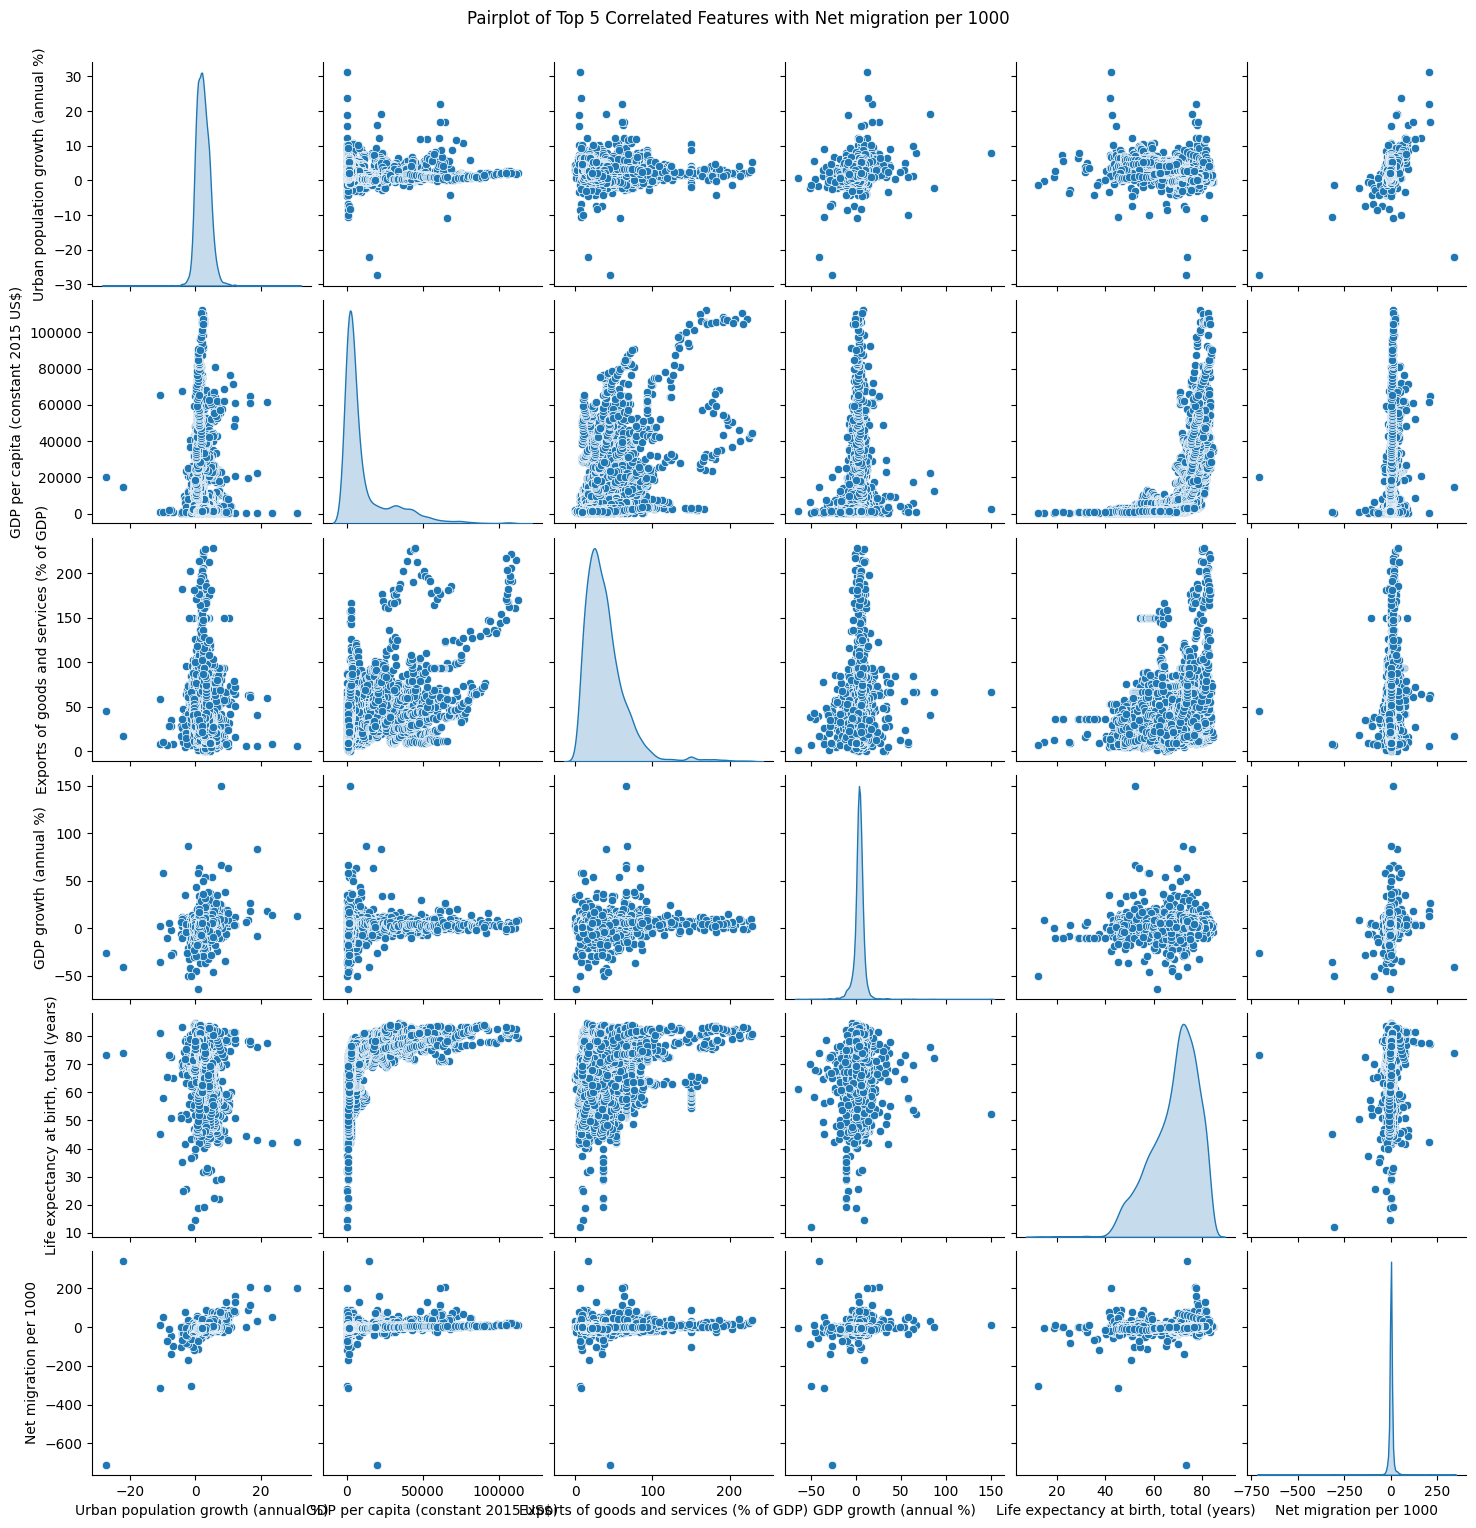

In [9]:
# ============================
# 9. Optional: pairplot for top 5 correlations
# ============================

# Get top 5 correlated features (excluding raw Net migration)
top5 = all_corr.drop("Net migration", errors="ignore").head(5).index.tolist()

# Ensure unique column list
cols_for_plot = list(dict.fromkeys(top5 + ["Net migration per 1000"]))

# Sanity check
print("Columns for pairplot:", cols_for_plot)

# Pairplot
sns.pairplot(eda[cols_for_plot], diag_kind="kde")
plt.suptitle("Pairplot of Top 5 Correlated Features with Net migration per 1000", y=1.02)
plt.show()

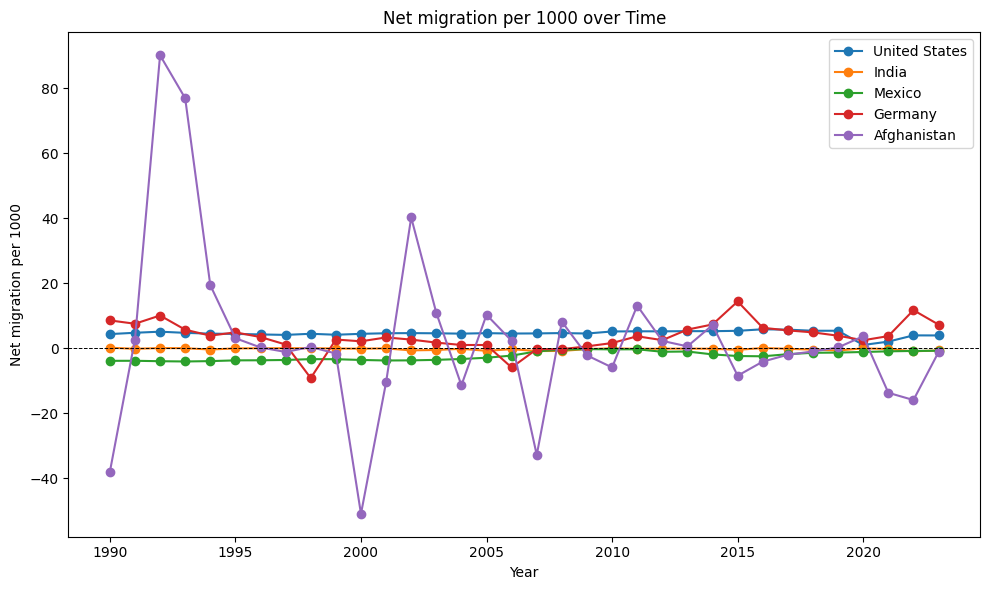

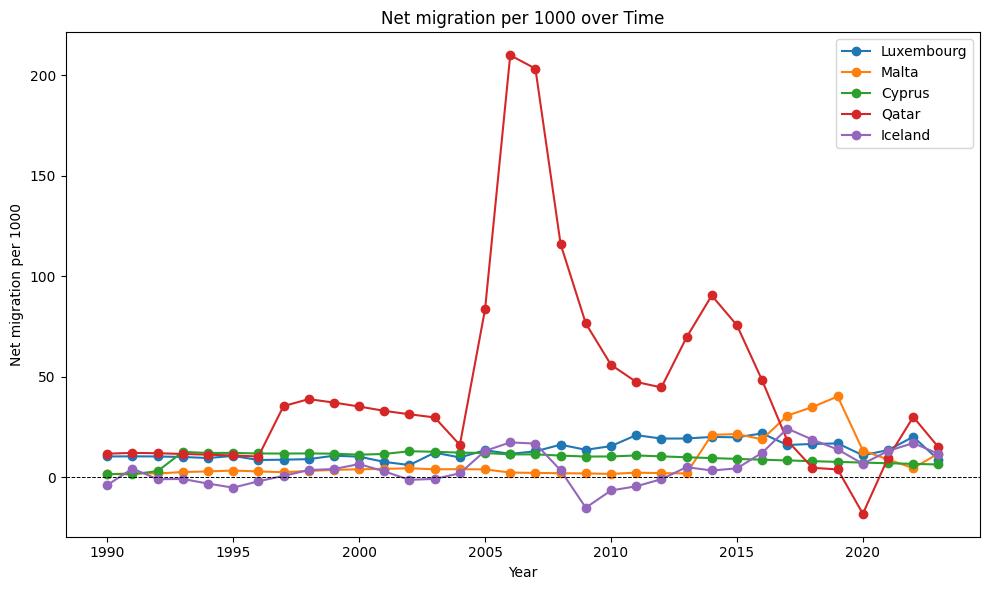

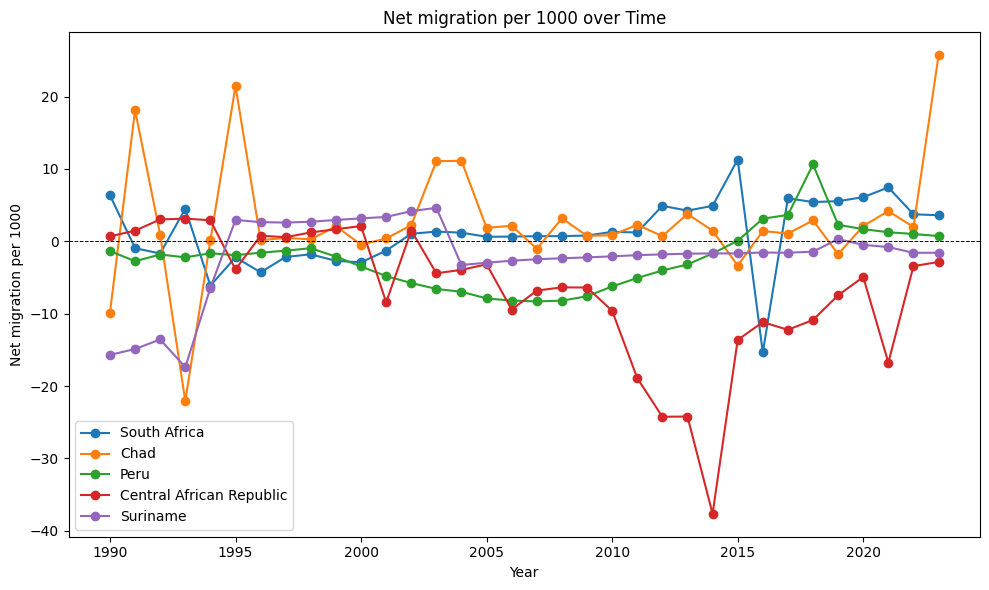

In [10]:
# ============================
# 10. Country-level time-series plots
# ============================

# Function to plot Net migration per 1000 for a given list of countries
def plot_time_series(countries, indicator="Net migration per 1000"):
    plt.figure(figsize=(10, 6))
    for country in countries:
        subset = eda[eda['Country_Name'] == country]
        plt.plot(subset['Year'], subset[indicator], marker="o", label=country)
    plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
    plt.title(f"{indicator} over Time")
    plt.xlabel("Year")
    plt.ylabel(indicator)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example 1: Big migration countries
plot_time_series(["United States", "India", "Mexico", "Germany", "Afghanistan"])

# Example 2: Small states with volatile migration
plot_time_series(["Luxembourg", "Malta", "Cyprus", "Qatar", "Iceland"])

# Example 3: Random sample of 5 countries
random_countries = eda['Country_Name'].drop_duplicates().sample(5, random_state=42).tolist()
plot_time_series(random_countries)

In [ ]:
# ============================
# 10. Country-level time-series plots
# ============================
big_mig_countries = ["United States", "India", "Mexico", "Germany", "Afghanistan"]

plt.figure(figsize=(12, 6))
for country in big_mig_countries:
    subset = eda[eda["Country_Name"] == country]
    plt.plot(subset["Year"], subset["Net migration per 1000"], label=country)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Net Migration per 1000: Major Migration Countries")
plt.xlabel("Year")
plt.ylabel("Net Migration per 1000 People")
plt.legend()
plt.show()

In [ ]:
# ============================
# 10. Country-level time-series table
# ============================
big_mig_countries = ["United States", "India", "Mexico", "Germany", "Afghanistan"]

# Create pivot table: rows = years, columns = countries
migration_table = (
    eda[eda["Country_Name"].isin(big_mig_countries)]
    .pivot(index="Year", columns="Country_Name", values="Net migration per 1000")
)

# Display first 15 years for readability
print(migration_table.head(40))

# Optionally save to CSV for inspection
migration_table.to_csv("data/big_migration_countries.csv")

In [ ]:
summary_stats = migration_table.describe().T[["min", "max", "mean", "std"]]
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats["volatility_index"] = summary_stats["range"] / summary_stats["mean"].abs()

print("\nSummary statistics for big migration countries:")
display(summary_stats)

In [ ]:
# ============================
# Example 2: Small states with volatile migration (table view)
# ============================

small_states = ["Luxembourg", "Malta", "Cyprus", "Qatar", "Iceland"]

# Pivot table
small_states_table = (
    eda[eda["Country_Name"].isin(small_states)]
    .pivot(index="Year", columns="Country_Name", values="Net migration per 1000")
)

# Show first 15 years for readability
print("\nNet Migration per 1000 for Small States (sample):")
display(small_states_table.head(40))

# Add summary stats to see volatility
small_states_summary = small_states_table.describe().T[["min", "max", "mean", "std"]]
small_states_summary["range"] = small_states_summary["max"] - small_states_summary["min"]
small_states_summary["volatility_index"] = small_states_summary["range"] / small_states_summary["mean"].abs()

print("\nSummary statistics for Small States:")
display(small_states_summary)

# Optionally save
small_states_table.to_csv("data/small_states_timeseries.csv")
small_states_summary.to_csv("data/small_states_summary.csv")

In [ ]:
eda['log_gdp_pc'] = np.log1p(eda['GDP per capita (constant 2015 US$)'])
eda['log_population'] = np.log1p(eda['Population, total'])

In [ ]:
eda['gdp_pc_growth'] = eda.groupby("Country_Name")['GDP per capita (constant 2015 US$)'].pct_change()
eda['population_growth'] = eda.groupby("Country_Name")['Population, total'].pct_change()

In [ ]:
eda['lag_net_mig'] = eda.groupby("Country_Name")['Net migration per 1000'].shift(1)

In [ ]:
# ============================
# Feature Engineering
# ============================

import numpy as np

# Copy dataset to avoid overwriting
features = eda.copy()

# ----------------------------------------
# 1. Log transformations (handle zeros with log1p)
# ----------------------------------------
features['log_gdp_pc'] = np.log1p(features['GDP per capita (constant 2015 US$)'])
features['log_population'] = np.log1p(features['Population, total'])
features['log_pop_density'] = np.log1p(features['Population density (people per sq. km of land area)'])

# ----------------------------------------
# 2. Growth rates (year-on-year % changes)
# ----------------------------------------
features['gdp_pc_growth'] = features.groupby("Country_Name")['GDP per capita (constant 2015 US$)'].pct_change()
features['population_growth'] = features.groupby("Country_Name")['Population, total'].pct_change()
features['urbanization_acceleration'] = features.groupby("Country_Name")['Urban population growth (annual %)'].diff()

# ----------------------------------------
# 3. Lagged variables
# ----------------------------------------
features['lag_net_mig'] = features.groupby("Country_Name")['Net migration per 1000'].shift(1)
features['lag_unemployment'] = features.groupby("Country_Name")['Unemployment, total (% of total labor force) (modeled ILO estimate)'].shift(1)
features['lag_hdi'] = features.groupby("Country_Name")['HDI'].shift(1)
features['lag_gdp_pc'] = features.groupby("Country_Name")['GDP per capita (constant 2015 US$)'].shift(1)

# ----------------------------------------
# 4. Ratios and derived indicators
# ----------------------------------------
features['trade_openness'] = (features['Exports of goods and services (% of GDP)'] +
                              features['Imports of goods and services (% of GDP)'])

features['fertility_gap'] = features['Fertility rate, total (births per woman)'] - 2.1  # replacement level

features['life_expectancy_gap'] = features['Life expectancy at birth, total (years)'] - 70  # arbitrary threshold

# ----------------------------------------
# 5. Year dummies (for global shocks)
# ----------------------------------------
year_dummies = pd.get_dummies(features['Year'], prefix='year')
features = pd.concat([features, year_dummies], axis=1)

# ----------------------------------------
# 6. Drop rows with NaNs introduced by lags & growth rates
# ----------------------------------------
features = features.dropna().reset_index(drop=True)

# ----------------------------------------
# Save engineered dataset
# ----------------------------------------
features.to_csv("data/wdi_hdr_features.csv", index=False)

print("✅ Feature engineering complete. Shape:", features.shape)